In [1]:
from utils import *
from diffusers import UNet2DModel
from diffusion_conditional import Diffusion
from types import SimpleNamespace

config = SimpleNamespace(    
    run_name = "sample",
    epochs = 10,
    noise_steps=1000,
    seed = 42,
    batch_size = 2,
    img_size = 128,
    channels = 1,
    dataset_path = "data",
    train_folder = "multicoil_train_single",
    val_folder = "multicoil_train_single",
    model_ckpt='./models/DDPM_conditional_v2/ckpt_4.pt',
    ema_model_ckpt='./models/DDPM_conditional_v2/ema_ckpt_4.pt',
    device = "cuda",
    do_validation = True,
    fp16 = True,
    log_every_epoch = 1,
    num_workers=6,
    lr = 1e-4
)

In [2]:
diffuser = Diffusion(
    config.noise_steps, 
    img_size=config.img_size, 
    batch_size=config.batch_size,
    channels=config.channels, 
    run_name=config.run_name,
    model_ckpt=config.model_ckpt,
    ema_model_ckpt=config.ema_model_ckpt
)

Loading pretrained models ./models/DDPM_conditional_v2/ckpt_4.pt and ./models/DDPM_conditional_v2/ema_ckpt_4.pt...


In [3]:
diffuser.prepare(config)

Train Dataset Size: 32
Val Dataset Size: 32


In [4]:
import matplotlib.pyplot as plt

In [5]:
# EMA model sampling with guidance
X = next(iter(diffuser.val_dataloader))
images_degraded = X['images_degraded']
images = X['images']

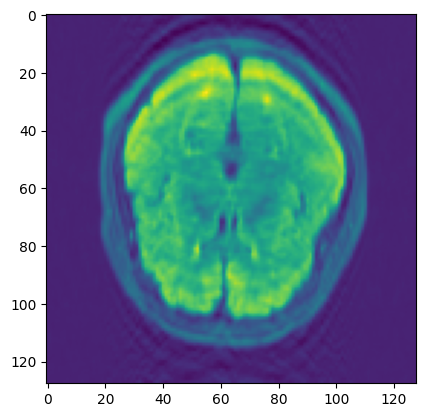

In [6]:
plt.imshow(images_degraded[0][0])

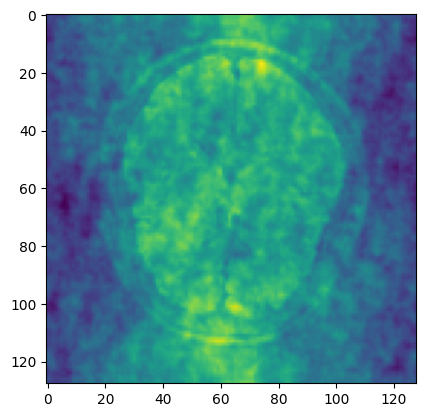

In [7]:
plt.imshow(images_degraded[1][0])

In [8]:
ema_sampled_images = diffuser.sample(use_ema=True, n=diffuser.batch_size, condition=images_degraded.to('cuda'))

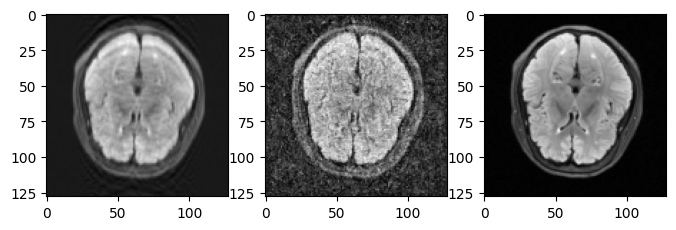

In [9]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(images_degraded[0][0], cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(ema_sampled_images[0], cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(images[0][0], cmap='gray')
plt.show()

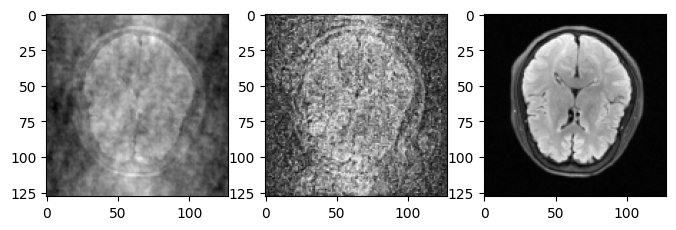

In [10]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(images_degraded[1][0], cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(ema_sampled_images[1], cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(images[1][0], cmap='gray')
plt.show()

In [11]:
ema_sampled_images_unc = diffuser.sample(use_ema=True, n=9, condition=None)

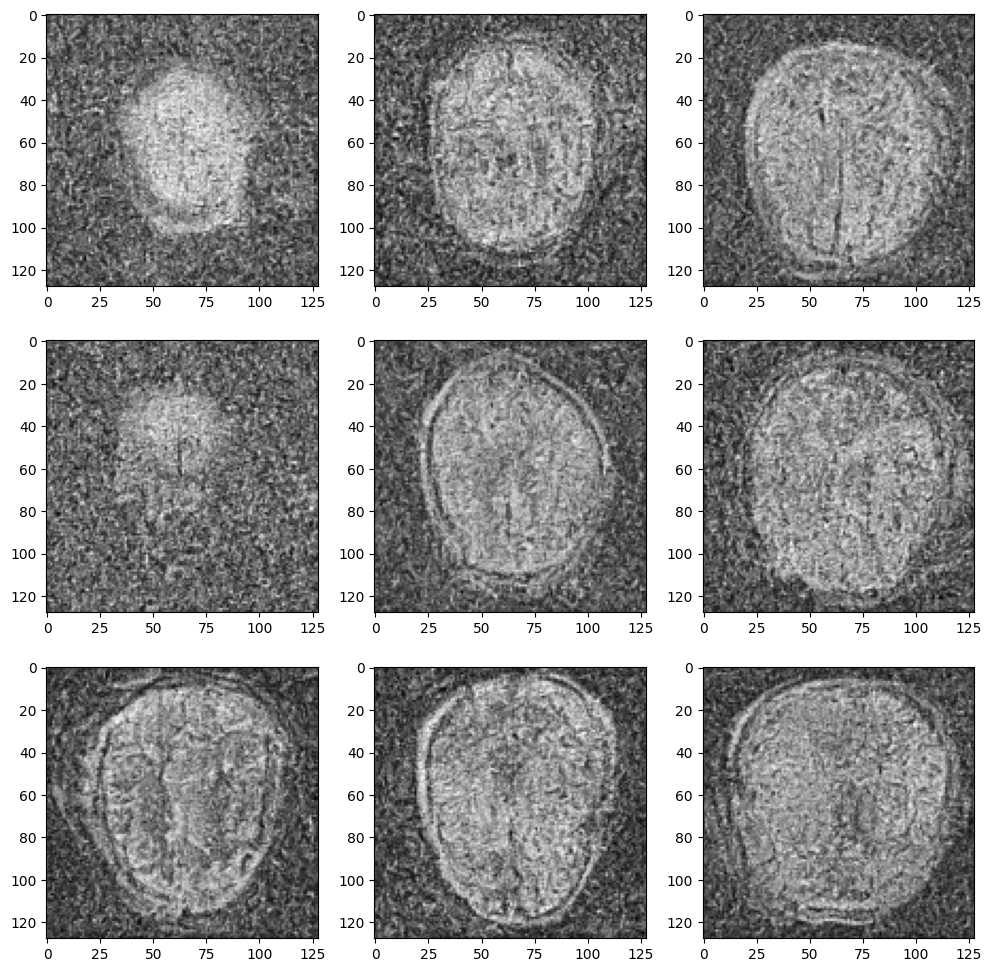

In [12]:
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(3, 3, 1)
plt.imshow(ema_sampled_images_unc[0], cmap='gray')
fig.add_subplot(3, 3, 2)
plt.imshow(ema_sampled_images_unc[1], cmap='gray')
fig.add_subplot(3, 3, 3)
plt.imshow(ema_sampled_images_unc[2], cmap='gray')
fig.add_subplot(3, 3, 4)
plt.imshow(ema_sampled_images_unc[3], cmap='gray')
fig.add_subplot(3, 3, 5)
plt.imshow(ema_sampled_images_unc[4], cmap='gray')
fig.add_subplot(3, 3, 6)
plt.imshow(ema_sampled_images_unc[5], cmap='gray')
fig.add_subplot(3, 3, 7)
plt.imshow(ema_sampled_images_unc[6], cmap='gray')
fig.add_subplot(3, 3, 8)
plt.imshow(ema_sampled_images_unc[7], cmap='gray')
fig.add_subplot(3, 3, 9)
plt.imshow(ema_sampled_images_unc[8], cmap='gray')
plt.show()